# Лабораторная работа №4
# Решение ДУЧП гиперболического типа

## 1. 2D уравнение конвекции

Необходимо решить уравнение конвекции
$$\frac{\partial T}{\partial t} + u\frac{\partial T}{\partial x} = 0,$$
при распространении косинусоидального импульса $$\phi(x) = cos(0.5 \pi x), x \in [0,1]$$

#### Необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
u, length, time, columns = 1., 1., 10, 30


def initial(x: float) -> float:
    return math.cos(math.pi * x / 2)

In [3]:
def explicity(c: float):
    dx = length / columns
    dt = dx * c / u
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1))
    
    for i in range(columns + 1):
        T[0][i] = initial(i * dx)
    
    for k in range(lines):
        for j in range(columns):
            T[k + 1][j] = T[k][j] - c * (T[k][j + 1] - T[k][j - 1]) / 2
    return T, dt

In [46]:
def draw(dt: float, u: list) -> None:
    a, b = np.shape(u)
    x = np.linspace(0, length, b)
    fig = plt.figure()
    
    ax1 = fig.add_subplot(221)
    ax1.grid()
    plt.plot(x, u[int(0.1 / dt), :])

    ax2 = fig.add_subplot(222)
    ax2.grid()
    plt.plot(x, u[int(0.5 / dt), :])

    ax3 = fig.add_subplot(223)
    ax3.grid()
    plt.plot(x, u[int(1 / dt), :])

    ax4 = fig.add_subplot(224)
    ax4.grid()
    plt.plot(x, u[int(10 / dt), :])
    
    plt.show()

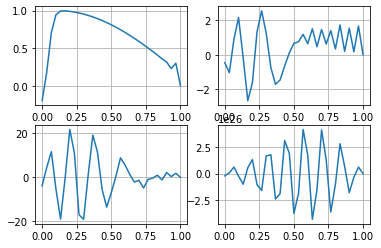

In [36]:
T, dt = explicity(c=0.5)
draw(dt, T)

In [37]:
def lax_wendroff(c: float):
    dx = length / columns
    dt = dx * c / u
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1))
    
    for i in range(columns + 1):
        T[0][i] = initial(i * dx)
    
    for k in range(lines):
        for j in range(columns):
            T[k+1][j]=T[k][j]-c*(T[k][j+1]-T[k][j-1])/2+c**2*(T[k][j+1]-2*T[k][j]+T[k][j-1])/2
    return T, dt

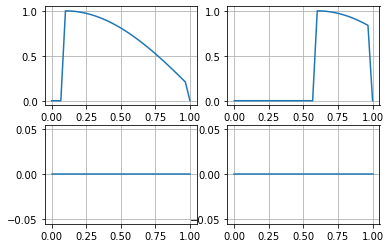

In [38]:
T, dt = lax_wendroff(c=1)
draw(dt, T)

In [39]:
def lax_wendroff_2step(c: float):
    dx = length / columns
    dt = dx * c / u
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1))
    
    for i in range(columns + 1):
        T[0][i] = initial(i * dx)
    
    for k in range(lines):
        prev_value = (T[k][1] + T[k][0]) / 2 - c * (T[k][1] - T[k][0]) / 2
        for j in range(columns):
            next_value = (T[k][j + 1] + T[k][j]) / 2 - c * (T[k][j + 1] - T[k][j]) / 2
            T[k + 1][j] = T[k][j] - c * (next_value - prev_value)
            prev_value = next_value
    return T, dt

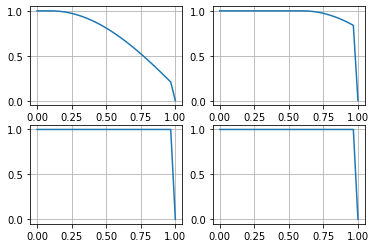

In [40]:
T, dt = lax_wendroff_2step(c=1)
draw(dt, T)

In [41]:
def mc_cormack(c: float):
    dx = length / columns
    dt = dx * c / u
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1))
    T_up = np.zeros((lines + 1, columns + 1))
    T_down = np.zeros((lines + 1, columns + 1))
    
    for i in range(columns + 1):
        T[0][i] = initial(i * dx)
        
    for k in range(lines):
        for j in range(columns):
            T_up[k + 1][j] = T[k][j] - c * (T[k][j + 1] - T[k][j])
            T_down[k + 1][j] = T[k][j] - c * (T_up[k][j + 1] - T_up[k][j])
            T[k + 1][j] = (T_up[k + 1][j] + T_down[k + 1][j]) / 2
    return T, dt

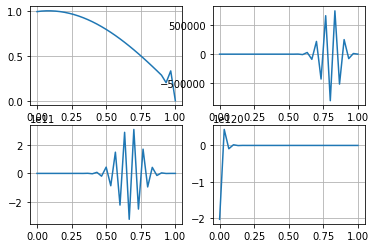

In [42]:
T, dt = mc_cormack(c=1)
draw(dt, T)

In [43]:
def upwind(c: float):
    dx = length / columns
    dt = dx * c / u
    lines = int(time / dt)
    T = np.zeros((lines + 1, columns + 1))
    
    for i in range(columns + 1):
        T[0][i] = initial(i * dx)
    
    for k in range(lines):
        for j in range(columns):
            T[k + 1][j] = T[k][j] - c * (T[k][j] - T[k][j - 1])
    return T, dt

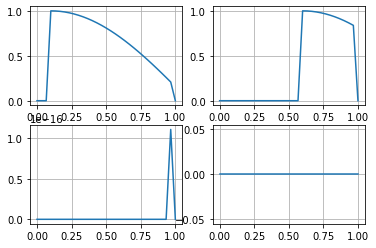

In [44]:
T, dt = upwind(c=1)
draw(dt, T)

In [45]:
T

array([[1.00000000e+00, 9.98629535e-01, 9.94521895e-01, ...,
        1.04528463e-01, 5.23359562e-02, 6.12323400e-17],
       [1.11022302e-16, 1.00000000e+00, 9.98629535e-01, ...,
        1.56434465e-01, 1.04528463e-01, 0.00000000e+00],
       [0.00000000e+00, 1.11022302e-16, 1.00000000e+00, ...,
        2.07911691e-01, 1.56434465e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])